In [1]:
#importing libraries and modules
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import os 

In [3]:
#reading the data in a dataframe df
df = pd.read_excel('../trendyol_tweets_sentiment.xlsx')

In [4]:
#printing the dataframe
df.head(10)

,Username,User,Timestamp,Response,Comments,Replys,Retweets,Likes,Sentiment
0,Candan Doğan,@candandogan007,2022-06-11 10:35:27,NaN,Adresten trendyol iade müthiş bi hizmet müthiş,NaN,NaN,NaN,pozitif
1,abdurrahman er,@abdurrahmanbmw_,2022-06-11 10:35:17,@Melikeguul_\n adlı kişiye yanıt olarak,3) Perşembe 19:46 da okula dağıtıma gidilmiş. ...,NaN,NaN,NaN,negatif
2,gk,@sanmiiyorum,2022-06-11 10:26:32,NaN,trendyol beni engelleme vaktin geldi de geciyo,NaN,NaN,NaN,pozitif
3,Çok tatlısın bee hiloş,@_Mrs_gold_grace,2022-06-11 10:20:45,NaN,Güzelin derdi ve Trendyol favorileri çok olur ...,NaN,1.0,4.0,pozitif
4,yağmur,@zephymr,2022-06-11 09:55:30,NaN,Allah kimsenin başına trendyol bağımlılığı ver...,NaN,NaN,6.0,pozitif
5,qaqpap,@qaqpap,2022-06-11 09:50:29,NaN,"#trendyol düşük kaliteli ürün satışlarıyla, k...",NaN,NaN,1.0,negatif
6,NaN,@killertiffanyy,2022-06-11 09:49:30,NaN,Trendyol sayesinde kredi kartımın borcu hiç bi...,NaN,NaN,NaN,pozitif
7,Serhat,@Serhazman,2022-06-11 09:45:50,NaN,Trendyol yemek reklamlarının da sizce boku çık...,NaN,NaN,NaN,negatif
8,Halise Öte,@anaouw,2022-06-11 09:38:51,NaN,Trendyol bana bildirim gönderip durma hayatima...,1.0,NaN,13.0,pozitif
9,smrgur,@smr_gur,2022-06-11 09:34:51,NaN,#trendyol \n@Trendyol\n @TrendyolDestek\n en ...,NaN,NaN,NaN,negatif


In [6]:
#veryfying the comments data
df['Comments'].value_counts()

#1320189859 nolu siparişim iptal edildiği halde teslime çekilip ücret iadesi yapılamamaktadır denmekte ,sipariş verdikten sonra iade hakkına sahip değil miyiz?bu nasıl bi dolandırıcılık                                                                             2
Trendyol’da indirim rezaleti! 750 TL’ye satmayıp iptal ettikleri ürüne 1 günde zam yaptılar\n\n#Persembe\n#9Haziran                                                                                                                                                   2
Adresten trendyol iade müthiş bi hizmet müthiş                                                                                                                                                                                                                        1
Trendyol da gezme hastalığına tutuldum,  beğendigim herseyi favorilerime ekliyorum,param olunca alirim diye. Canim sıkıldıkça da ne favorilemisim diye girip bakıyorum, sonra da ayy ne güzel insallah alırım di

In [7]:
#veryfying the sentiments values
df['Sentiment'].value_counts()

negatif    675
pozitif    501
Name: Sentiment, dtype: int64

In [8]:
#drop the unnecessary columns
df = df.drop(['Username','User','Timestamp','Response','Replys','Retweets','Likes'], axis=1)

In [9]:
#printing the dataframe
df.head(10)

,Comments,Sentiment
0,Adresten trendyol iade müthiş bi hizmet müthiş,pozitif
1,3) Perşembe 19:46 da okula dağıtıma gidilmiş. ...,negatif
2,trendyol beni engelleme vaktin geldi de geciyo,pozitif
3,Güzelin derdi ve Trendyol favorileri çok olur ...,pozitif
4,Allah kimsenin başına trendyol bağımlılığı ver...,pozitif
5,"#trendyol düşük kaliteli ürün satışlarıyla, k...",negatif
6,Trendyol sayesinde kredi kartımın borcu hiç bi...,pozitif
7,Trendyol yemek reklamlarının da sizce boku çık...,negatif
8,Trendyol bana bildirim gönderip durma hayatima...,pozitif
9,#trendyol \n@Trendyol\n @TrendyolDestek\n en ...,negatif


In [10]:
#define a function to remove the @mentions and other useless text from the tweets
def cleaning_txtdata(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text)            #removing @mentions
    text = re.sub(r'@[A-Za-zA-Z0-9]+', '', text)         #removing @mentions
    text = re.sub(r'@[A-Za-z]+', '', text)               #removing @mentions
    text = re.sub(r'@[-)]+', '', text)                   #removing @mentions
    text = re.sub(r'#', '', text)                        #removing '#' sign
    text = re.sub(r'RT[\s]+', '', text)                  #removing RT
    text = re.sub(r'https?:\/\/\S+', '', text)           #removing the hyper link
    text = re.sub(r'&[a-z;]+', '', text)                 #removing '&gt;'
    text = re.sub(r'\n+', '', text)                      #removing '\n'
    text = re.sub(r'\s\s+', '', text)                    #removing space
    text = re.sub(r'^,+$', '', text)                     #removing number
    return text

df['Comments'] = df['Comments'].apply(cleaning_txtdata)  #saving clear data
df['Comments']=df['Comments'].str.lower()                #lowercase
df

,Comments,Sentiment
0,adresten trendyol iade müthiş bi hizmet müthiş,pozitif
1,3) perşembe 19:46 da okula dağıtıma gidilmiş. ...,negatif
2,trendyol beni engelleme vaktin geldi de geciyo,pozitif
3,güzelin derdi ve trendyol favorileri çok olur ...,pozitif
4,allah kimsenin başına trendyol bağımlılığı ver...,pozitif
...,...,...
1171,trendyol yemek bence bayağı başarılı bu konuda...,pozitif
1172,yemek sepetini zaten sevmiyordum cok ilgisizle...,pozitif
1173,yemek siparişimi getirmedi. siparişi i̇ptal e...,negatif
1174,"kanka 5li boxer trendyol da uygun vardır,bulursun",pozitif


In [11]:
#converting string data to number data
def encode_sentiments(sentiment):
    if sentiment == 'pozitif':
        return 1
    else:
        return 0
    
df['Sentiment'] = df['Sentiment'].apply( encode_sentiments)
df.head(10)

,Comments,Sentiment
0,adresten trendyol iade müthiş bi hizmet müthiş,1
1,3) perşembe 19:46 da okula dağıtıma gidilmiş. ...,0
2,trendyol beni engelleme vaktin geldi de geciyo,1
3,güzelin derdi ve trendyol favorileri çok olur ...,1
4,allah kimsenin başına trendyol bağımlılığı ver...,1
5,"trendyoldüşük kaliteli ürün satışlarıyla, karg...",0
6,trendyol sayesinde kredi kartımın borcu hiç bi...,1
7,trendyol yemek reklamlarının da sizce boku çık...,0
8,trendyol bana bildirim gönderip durma hayatima...,1
9,trendyolen ufak bir hata yok.trendyol tüketici...,0


In [124]:
#splitting the data into training and testing data
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df['Comments'].values, df['Sentiment'].values, test_size = 0.20)

In [125]:
#Digitizes data and assigns a numeric value to each categorical data
from sklearn.preprocessing import LabelEncoder

x = df.drop(['Sentiment'], axis=1)
y = df.Sentiment
lb = LabelEncoder()
y = lb.fit_transform(y)

In [126]:
#checking the data split
print('Sentiment Text: ', x_train[0])
print('Sentiment: ', y_train[0])

Sentiment Text:  trendyol, bir hafta sonra kurban bayramı için indirim yapmaya başlar
Sentiment:  1


In [127]:
#converting the strings into integers using Tekonizer
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

#instantiating the tekonizer
max_vocab = 20000000
tokenizer = Tokenizer(num_words=max_vocab)
tokenizer.fit_on_texts(x_train)

In [128]:
#checking the word index and find out the vocabulary of the dataset
wordidx = tokenizer.word_index
V = len(wordidx)
print('The size of dataset vocab is: ', V)

The size of dataset vocab is:  5981


In [129]:
#converting train and test sentences into sequences
train_seq = tokenizer.texts_to_sequences(x_train)
test_seq = tokenizer.texts_to_sequences(x_test)
print('Train Sequences: ', train_seq[0])
print('Test Sequences: ', test_seq[0])

Train Sequences:  [1, 2, 109, 43, 1647, 1648, 11, 45, 598, 1649]
Test Sequences:  [1, 3474]


In [130]:
#padding the sequences to get equal length sequence because its convertioanel to use same size sequences
#padding the train sequence
pad_train = pad_sequences(train_seq)
T = pad_train.shape[1]
print('The length of training sequence is: ', T)

The length of training sequence is:  46


In [131]:
#padding the test sequence
pad_test = pad_sequences(test_seq, maxlen=T)
print('The length of training sequence is: ', pad_test.shape[1])

The length of training sequence is:  46


In [132]:
#building the model
from tensorflow.keras.layers import Input, Dense, Embedding, LSTM, GlobalMaxPooling1D
from tensorflow.keras.models import Model

D = 20
M = 15

i = Input(shape=(T,))
x = Embedding(V+1, D)(i)
x = LSTM(M, return_sequences=True)(x)
x = GlobalMaxPooling1D()(x)
x = Dense(32,activation='relu')(x)
x = Dense(1,activation='sigmoid')(x)

model = Model(i,x)

In [133]:
#compiling the model
model.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=['accuracy'])
model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 46)]              0         
                                                                 
 embedding_3 (Embedding)     (None, 46, 20)            119640    
                                                                 
 lstm_3 (LSTM)               (None, 46, 15)            2160      
                                                                 
 global_max_pooling1d_3 (Glo  (None, 15)               0         
 balMaxPooling1D)                                                
                                                                 
 dense_6 (Dense)             (None, 32)                512       
                                                                 
 dense_7 (Dense)             (None, 1)                 33        
                                                           

In [134]:
#training the model
r = model.fit(pad_train, y_train, validation_data=(pad_test, y_test), epochs=4)

Epoch 1/4
30/30 [==============================] - 3s 33ms/step - loss: 0.6855 - accuracy: 0.5745 - val_loss: 0.6801 - val_accuracy: 0.5720
Epoch 2/4
30/30 [==============================] - 1s 20ms/step - loss: 0.6719 - accuracy: 0.5745 - val_loss: 0.6593 - val_accuracy: 0.5720
Epoch 3/4
30/30 [==============================] - 1s 20ms/step - loss: 0.6042 - accuracy: 0.5777 - val_loss: 0.5849 - val_accuracy: 0.7415
Epoch 4/4
30/30 [==============================] - 1s 20ms/step - loss: 0.4576 - accuracy: 0.8500 - val_loss: 0.5278 - val_accuracy: 0.7415


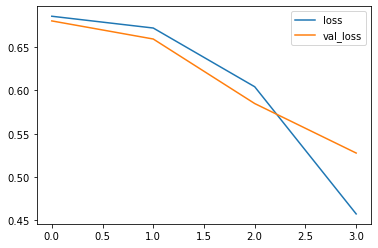

In [135]:
#evaluating the model
#plotting the loss and validation loss of the model
plt.plot(r.history['loss'], label = 'loss')
plt.plot(r.history['val_loss'], label = 'val_loss')
plt.legend()

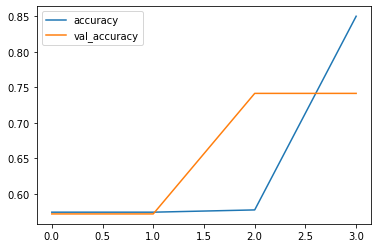

In [136]:
#plotting the accuracy and validation accuracy of the model
plt.plot(r.history['accuracy'], label = 'accuracy')
plt.plot(r.history['val_accuracy'], label = 'val_accuracy')
plt.legend()

In [137]:
#predicting the sentiment of any text
def predict_sentiment(text):
    
    text_seq = tokenizer.texts_to_sequences(text)
    text_pad = pad_sequences(text_seq, maxlen=T)
    
    predicted_sentiment = model.predict(text_pad).round()
    
    if predicted_sentiment == 1:
        return(print('It is a pozitif sentiment'))
    else:
        return(print('It is a negatif sentiment'))
    
text1 = ['Ben bundan sonra trendyoldan hiçbir şey almam']
predict_sentiment(text1)
text2 = ['Bundan sonra sadece trendyol yemekden sipariş veririm']
predict_sentiment(text2)

1/1 [==============================] - 0s 306ms/step
It is a negatif sentiment
1/1 [==============================] - 0s 17ms/step
It is a pozitif sentiment
